In [ ]:
from transformers import pipeline

# 显式指定模型和版本（推荐！）
classifier = pipeline(
    task="sentiment-analysis",
    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",
    revision="714eb0f"  # 指定 Git commit hash（可选）
)

result = classifier("I love Hugging Face!")
print(result)  # 输出: [{'label': 'POSITIVE', 'score': 0.9998}]


# 2.1数据集

In [ ]:
from huggingface_hub import list_datasets

all_datasets = list(list_datasets())  # 用 list() 包裹生成器
print(f"数据集总数: {len(all_datasets)}")
print(f"there are {len(all_datasets)} datasets on the hub")



## 使用load_dataset()函数加载数据集

In [1]:
from datasets import load_dataset
emotions = load_dataset("emotion")
emotions

Using the latest cached version of the dataset since emotion couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'split' at C:\Users\liangzhi_danta\.cache\huggingface\datasets\emotion\split\0.0.0\cab853a1dbdf4c42c2b3ef2173804746df8825fe (last modified on Tue May 13 14:37:43 2025).


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

## 使用字典的语法来分割数据

In [2]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

以上代码返回一个dataset类的实例。它类似于普通的python数组或列表，因此我们可以查询长度，或者进行索引访问。

In [3]:
print(len(train_ds))
print(train_ds[3])

16000
{'text': 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'label': 2}


In [4]:
print(train_ds.column_names)
print(train_ds.features)

['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


## 从Datasets到DataFrame
### set_fromat()方法

In [5]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


### 将label中的int换成对应的标注名称，使用int2str()方法

In [6]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)
df["label_name"] = df["label"].apply(label_int2str)
df.head()


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


# 2.1.3 查看类分布
## 可视化类分布，使用pandas和matplotlib🥲

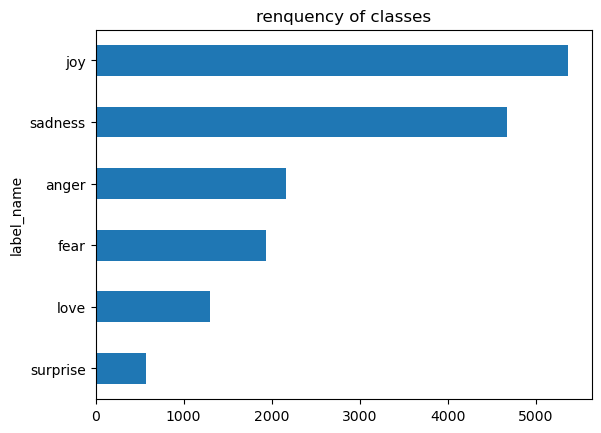

In [7]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("renquency of classes")
plt.show()

## 子词词元化
使用AutoTokenizer类，可以快速加载预训练模型相关的词元分析器，只需调用from_pretrained()方法即可。

In [8]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

我们输入一段文本来检验这个词元分析器是如何工作的。

In [9]:
text = "Tokenizing text is a core task of NLP."
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


通过词元分析器的convert_ids_to_tokens()方法将他们换回词元

In [10]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)
print(tokenizer.convert_tokens_to_string(tokens))

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']
[CLS] tokenizing text is a core task of nlp. [SEP]


In [11]:
###检查词表的大小
print(tokenizer.vocab_size)
###模型上下文的大小
print(tokenizer.model_max_length)

30522
512


#2.2.4对整个数据集进行词元化
使用DatasetDict对象的map()方法对整个语料库进行词元化。首先定义处理函数

In [12]:
# 重置为默认的Arrow格式
emotions.reset_format()

In [13]:
# 修改你的tokenizer调用部分
def tokenize(batch):
    return tokenizer(batch["text"], 
                    padding="max_length",  # 自动填充到最大长度
                    truncation=True,       # 自动截断到最大长度
                    max_length=512,        # 显式设置模型最大长度
                    )

In [14]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

定义好处理函数之后，通过一行代码将该函数应用到语料库整个数据集。batched设置为True表示按批量对推文进行编码;batch_size = None表示将整个数据集作为一个批量。

In [15]:
emotions_encoded = emotions.map(tokenize,batched=True,batch_size=None)

In [16]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


# 2.3训练文本分类器
## 2.3.1使用transformer作为特征提取器

AutoModel具有from_pretrained()方法，可用于加载预训练模型的权重。

In [ ]:
from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)
print("device is",device)
"""print(model)  # 输出模型结构"""

device is cuda


'print(model)  # 输出模型结构'

提取最终隐藏状态,将字符串编码成token，再将token转换为tensor


In [18]:
text = "this is a very suck test"
inputs = tokenizer(text,return_tensors="pt")
print(f"input tensor shape: {inputs['input_ids'].size()}")
inputs


input tensor shape: torch.Size([1, 8])


{'input_ids': tensor([[  101,  2023,  2003,  1037,  2200, 11891,  3231,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

从上面可以看到，tensor的形状为[batch_size, n_tokens]，最后一步是将它们放置在与模型相同的设备上，并按以下方式传入。

In [19]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():#禁用梯度自动计算，减少计算的内存占用
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1165, -0.0300,  0.0867,  ..., -0.1394,  0.1941,  0.4099],
         [-0.1636, -0.3947, -0.0280,  ..., -0.3535,  0.4851,  0.3097],
         [-0.3185, -0.2832,  0.1335,  ..., -0.2396,  0.2296,  0.7341],
         ...,
         [ 0.2058, -0.3295,  0.1869,  ..., -0.0828,  0.1266, -0.3099],
         [ 0.1981, -0.3450, -0.4049,  ..., -0.1551,  0.1298, -0.3955],
         [ 0.8930,  0.1479, -0.4703,  ...,  0.0723, -0.5457, -0.2478]]],
       device='cuda:0'), hidden_states=None, attentions=None)


每个隐藏状态的形状[batch_size, n_tokens, hidden_dim]，即每个输入词元都会返回一个768维向量

In [20]:
outputs.last_hidden_state.size()

torch.Size([1, 8, 768])

对于分类任务，通常只使用与[CLS]词元关联的隐藏状态作为输入特征，由于此词元出现在每个序列开头，我们可以通过简单地索引outputs.last_hidden_state来提取。


In [21]:
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

以上是针对单个字符串获取最终的隐藏状态的方法，现在创建一个新的hidden_states来对整个数据集进行相同操作。像在词元分析器中一样，使用Dataset.map()方法来并行化处理数据集。首先是将先前的步骤封装在一个处理函数中。

In [22]:
def extract_hidden_states(batch):
    #place model inputs on the GPU 
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    #extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    #return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

上述函数与之前的逻辑唯一不同的是最后一步，即将last_hidden_state作为Numpy数组放回cpu，因为我们使用batch输入时，map()方法要求处理函数返回python或numpy对象。

由于我们的模型期望输入张量，下面将inputs_ids和attention_mask转换为张量

In [23]:
emotions_encoded.set_format("torch",
                             columns=["input_ids", "attention_mask"])

In [24]:
import torch
print(torch.__version__)            # 应显示 2.x.x+cu121

print(f"CUDA 是否可用: {torch.cuda.is_available()}")  # 应返回 True
print(f"当前 GPU 设备: {torch.cuda.get_device_name(0)}")  # 应显示你的 GPU 型号

2.1.0
CUDA 是否可用: True
当前 GPU 设备: NVIDIA GeForce RTX 3050 Ti Laptop GPU


之后可以一次性提取所有的隐藏状态

In [25]:
emotions_hidden = emotions_encoded.map(extract_hidden_states,batched=True,batch_size=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [26]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

我们得到了每个推文的隐藏状态，下一步是训练一个分类器。为此，需要一个特征矩阵。

## 创建特征矩阵
我们将使用隐藏状态作为输入特征，标注作为目标，创建如下的对应数组

In [27]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((16000, 768), (2000, 768), (16000,), (2000,))

训练之前，进行快速检查以确保提供了我们想要的分类
## 可视化训练集
使用UMAP算法将768维向量空间映射到2维空间。UMAP在特征缩放到[0,1]时效果最佳，所以首先应用MinMaxScaler，然后使用umap-learn库中的UMAP算法进行降维。

In [28]:
import umap
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

#scale fearures to [0,1] range  
x_scale = MinMaxScaler().fit_transform(X_train)
#initialize and fit UMAP 
mapper = UMAP( n_components=2, metric='cosine').fit(x_scale)
#create a new dataframe of 2d embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.071641,3.814710,0
1,-3.310803,4.541624,0
2,4.875515,7.193509,3
3,-2.834070,6.639454,2
4,-3.657166,6.360585,3


结果是一个数组，该数组具有有形同的训练样本量，但只有2个特征，而不是我们最初的768个特征。线面绘制每个类别的点密度图。

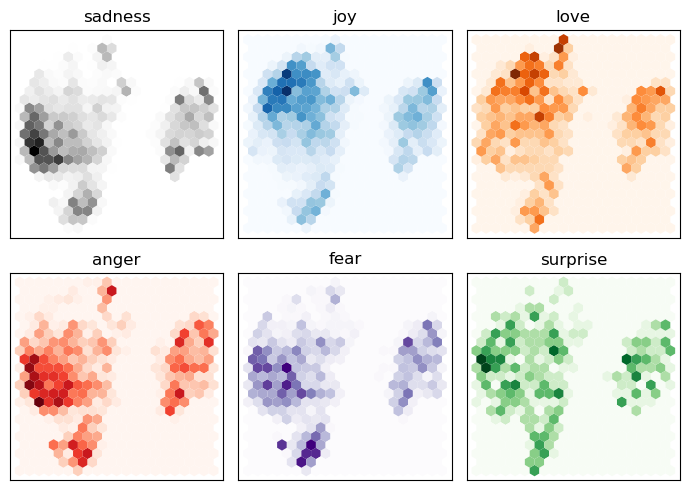

In [41]:
fig , axes = plt.subplots(nrows=2, ncols=3, figsize=(7, 5))
axes = axes.flatten()
cmaps = ["Greys", 'Blues', "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], 
                   cmap=cmap, 
                   gridsize=20, 
                   linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

下面要基于数据集训练模型
## 训练一个简单的分类器
使用Scikit-Learn库，训练这样一个简单的模型很快而且不需要GPU。

In [42]:
from sklearn.linear_model import LogisticRegression
# we increase 'max_iter' to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

Scikit-learn中有DummyClassifier可以用于构建具有简单启发式的分类器，例如始终选择多数类或者始终选择随即类，因为我们的数据集是不平衡的多分类数据集，因此选择的最佳表现的启发式是始终选择最常见的类，这会产生35%的准确率。

In [44]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

因此，使用DistilBert嵌入的简单分类器明显优于基线，可以通过查看分类器的混淆矩阵来进一步研究模型的性能，该矩阵告诉我们真实标注和预测标注之间的关系。

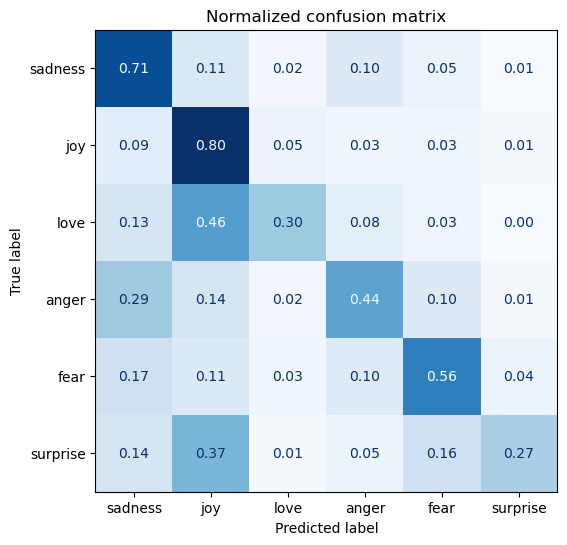

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)


In [47]:
# 验证集准确度（你已实现）
valid_accuracy = lr_clf.score(X_valid, y_valid)
print(f"Validation Accuracy: {valid_accuracy:.2%}")

# 训练集准确度（检查过拟合）
train_accuracy = lr_clf.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.2%}")

Validation Accuracy: 63.35%
Train Accuracy: 69.41%


In [49]:
from sklearn.metrics import classification_report

# 生成详细报告
report = classification_report(y_valid, y_pred, target_names=labels, digits=3)
print(report)

# 输出示例：
#               precision    recall  f1-score   support
#      sadness      0.832     0.862     0.846       581
#          joy      0.809     0.857     0.832       695
#         love      0.673     0.488     0.565       159
#...

              precision    recall  f1-score   support

     sadness      0.649     0.709     0.678       550
         joy      0.707     0.801     0.751       704
        love      0.486     0.298     0.369       178
       anger      0.508     0.436     0.470       275
        fear      0.549     0.557     0.553       212
    surprise      0.537     0.272     0.361        81

    accuracy                          0.633      2000
   macro avg      0.573     0.512     0.530      2000
weighted avg      0.620     0.633     0.621      2000

